In [38]:
#Import necessary packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import tensorflow as tf

In [19]:
#loading train, val, and test data
train_data = np.load('audiobook_train_data.npz')

train_inputs = train_data['inputs'].astype('float')
train_targets = train_data['targets'].astype('int')

val_data = np.load('audiobook_val_data.npz')
val_inputs = val_data['inputs'].astype('float')
val_targets = val_data['targets'].astype('int')

test_data = np.load('audiobook_test_data.npz')
test_inputs = test_data['inputs'].astype('float')
test_targets = test_data['targets'].astype('int')

In [20]:
print(train_inputs.shape,
train_targets.shape, 
val_inputs.shape, val_targets.shape, test_inputs.shape, test_targets.shape)

(11267, 10) (11267,) (1408, 10) (1408,) (1409, 10) (1409,)


# Create Model

In [26]:
#label my hyperperameters
hidden_layer_size = 400
input_layer = train_inputs.shape[0]
output_layer = 2

#create model
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            #tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                            tf.keras.layers.Dense(output_layer, activation = 'softmax')
])

#create optimizer and loss function
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

batch_size = 100
max_epochs = 100

early_stop = tf.keras.callbacks.EarlyStopping()


In [27]:
model.fit(train_inputs, train_targets,
         batch_size = batch_size,
          epochs = max_epochs,
          validation_data = (val_inputs, val_targets),
          callbacks = [early_stop],
          verbose = 2)

Epoch 1/100
113/113 - 2s - loss: 0.3345 - accuracy: 0.8843 - val_loss: 0.2651 - val_accuracy: 0.9062
Epoch 2/100
113/113 - 0s - loss: 0.2645 - accuracy: 0.9030 - val_loss: 0.2519 - val_accuracy: 0.9105
Epoch 3/100
113/113 - 0s - loss: 0.2524 - accuracy: 0.9049 - val_loss: 0.2386 - val_accuracy: 0.9162
Epoch 4/100
113/113 - 0s - loss: 0.2444 - accuracy: 0.9074 - val_loss: 0.2358 - val_accuracy: 0.9162
Epoch 5/100
113/113 - 0s - loss: 0.2402 - accuracy: 0.9073 - val_loss: 0.2312 - val_accuracy: 0.9183
Epoch 6/100
113/113 - 0s - loss: 0.2375 - accuracy: 0.9088 - val_loss: 0.2255 - val_accuracy: 0.9190
Epoch 7/100
113/113 - 0s - loss: 0.2368 - accuracy: 0.9067 - val_loss: 0.2309 - val_accuracy: 0.9197


# Optimizing Hyperparameters

In [24]:
col_names = ['hidden_layer_size', 'val_accuracy']
results_df = pd.DataFrame(columns= col_names)
for hidden_layer_size in list(range(200, 800, 50)):
    #create model
    model = tf.keras.Sequential([
                                tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                                #tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                                tf.keras.layers.Dense(output_layer, activation = 'softmax')
    ])
    #create optimizer and loss function
    model.compile(optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(patience=2)
    results = model.fit(train_inputs, train_targets,
         batch_size = batch_size,
          epochs = max_epochs,
          validation_data = (val_inputs, val_targets),
          callbacks = [early_stop],
          verbose = 0)
    val_accuracy = results.history['val_accuracy'][len(results.history['val_accuracy']) -1]
    to_append = [hidden_layer_size ,val_accuracy]
    df_length =  len(results_df)
    results_df.loc[df_length] = to_append

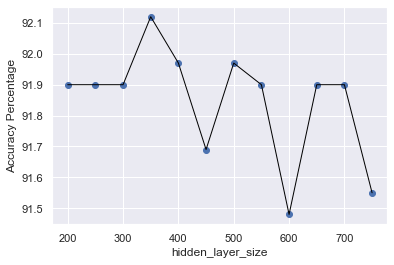

In [53]:
plt.scatter(results_df.hidden_layer_size, round(results_df.val_accuracy,4)*100)
plt.plot(results_df.hidden_layer_size, round(results_df.val_accuracy,4)*100,linewidth=1,color='black' )
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy Percentage')
plt.show()
#plt.savefig('Audiobook_graph.jpg')


In [25]:
#As shown below, this is where I drew on the hyperperameters used for my origonal model:
results_df.sort_values('val_accuracy', ascending= False)

,hidden_layer_size,val_accuracy
3,350.0,0.921165
4,400.0,0.919744
6,500.0,0.919744
0,200.0,0.919034
1,250.0,0.919034
2,300.0,0.919034
7,550.0,0.919034
9,650.0,0.919034
10,700.0,0.919034
5,450.0,0.916903


In [16]:
#As shown below, this is where I drew on the hyperperameters used for my origonal model:
results_df.sort_values('val_accuracy', ascending= False)

,hidden_layer_size,val_accuracy
4,400.0,0.921165
6,500.0,0.920455
7,550.0,0.919744
3,350.0,0.918324
8,600.0,0.917614
1,250.0,0.916193
10,700.0,0.916193
11,750.0,0.916193
0,200.0,0.915483
5,450.0,0.914062


In [28]:
#Our model showed a 90% accuracy
model.evaluate(test_inputs,test_targets)

45/45 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9028


[0.2542424201965332, 0.9027678966522217]

**Interpretation**

Given our data, we can correctly predict 9 out of 10 times if an individual will continue to use this
Audiobook platform.